<a href="https://colab.research.google.com/github/jleacock2020/CourseraDataAnalystWork/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model Evaluation**

Model evaluation tells us how our model performs in the real world. In the previous module, we talked about in-sample evaluation. In-sample evaluation tells us how well our model fits the data already given to train it. It does not give us an estimate of how well the train model can predict new data.

**Solution**

The solution is to split our data up, use the in-sample data or training data to train the model. The rest of the data, called Test Data, is used as out-of-sample data. This data is then used to approximate, how the model performs in the real world. Separating data into training and testing sets is an important part of model evaluation. We use the test data to get an idea how our model will perform in the real world.



When we split a dataset, usually the larger portion of data is used for training and a smaller part is used for testing. **For example, we can use 70 percent of the data for training. We then use 30 percent for testing. We use training set to build a model and discover predictive relationships.** We then use a testing set to evaluate model performance. When we have completed testing our model, we should use all the data to train the model. **A popular function, in the scikit-learn package for splitting datasets, is the train test split function.** This function randomly splits a dataset into training and testing subsets

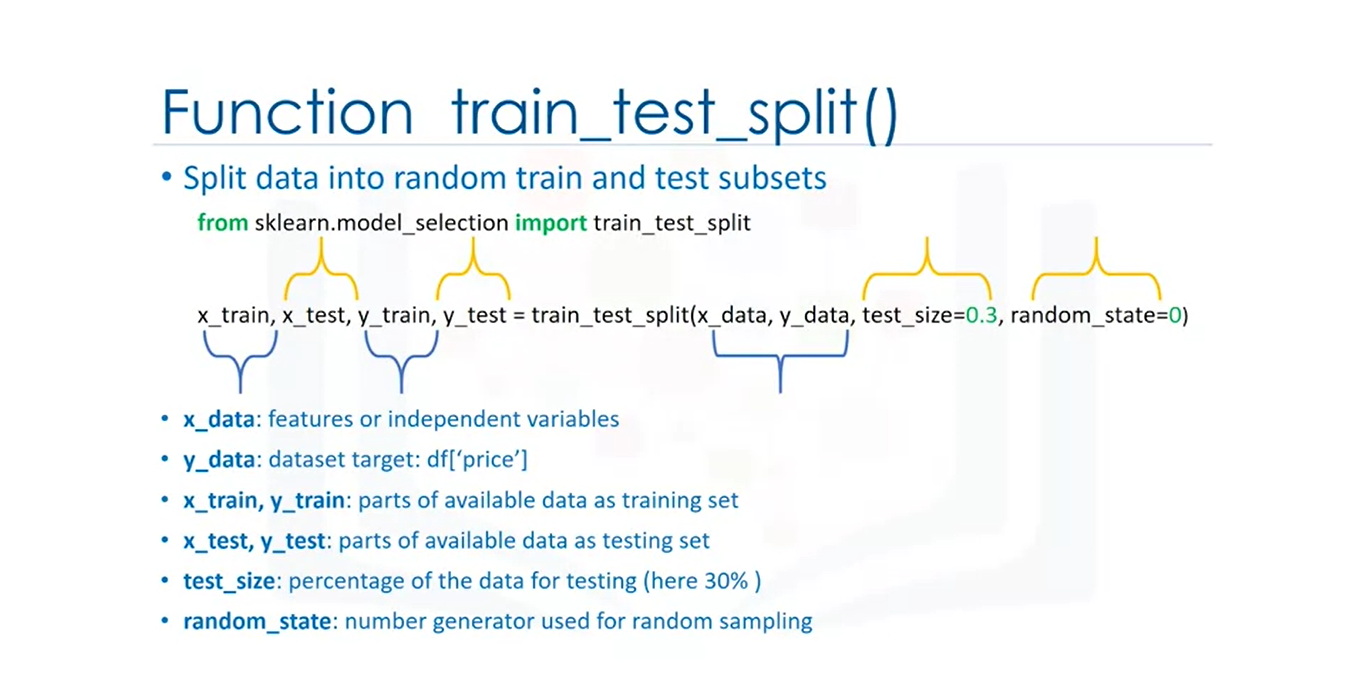

The random_state is a pseudo-random number parameter that allows you to reproduce the same train test split each time you run the code. There are a number of reasons why people use random_state , including software testing, tutorials like this one and talks.

There is always a need to validate the stability of your machine learning model. I mean you just can’t fit the model to your training data and hope it would accurately work for the real data it has never seen before. You need some kind of assurance that your model has got most of the patterns from the data correct, and its not picking up too much on the noise, or in other words its low on bias and variance.

Generalization Error:

generalization error is a measure of how well a machine learning model performs (i.e., predicts) on previously, unseen data

In [ ]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
# read dataset
dataset = pd.read_csv("HOUSEPRICE.csv")
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [ ]:
# y = dataset.Price # define the target variable (dependent variable) as y
# create training and testing vars
dataset.dropna(inplace=True)
X = dataset['Rooms'].values.reshape(-1,1)
y = dataset['Price'].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)
#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(38746, 1) (38746, 1)
(9687, 1) (9687, 1)


In [ ]:
# fit a model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# lm = LinearRegression()
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
# Evaluate the model on the test set

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)


# predictions = lm.predict(X_test)
# predictions[0:5]

0.17387641206334603


Text(0, 0.5, 'Predictions')

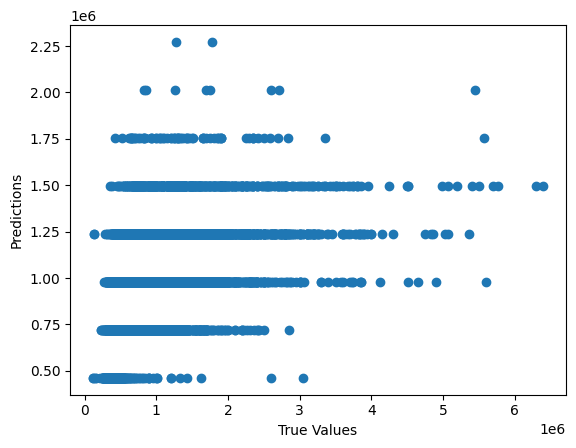

In [ ]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
print ("Score:", model.score(X_test, y_test))

Score: 0.17387641206334603


 I’ve loaded in the data, split it into a training and testing sets, fitted a regression model to the training data, made predictions based on this data and tested the predictions on the test data. Seems good, right? But train/test split does have its dangers — what if the split we make isn’t random? What if one subset of our data has only people from a certain state, employees with a certain income level but not other income levels, only women or only people at a certain age? (imagine a file ordered by one of these). This will result in overfitting, even though we’re trying to avoid it! This is where cross validation comes in.

As mentioned, in statistics and machine learning we usually split our data into two subsets: training data and testing data (and sometimes to three: train, validate and test), and fit our model on the train data, in order to make predictions on the test data. When we do that, one of two thing might happen: we overfit our model or we underfit our model. We don’t want any of these things to happen, because they affect the predictability of our model — we might be using a model that has lower accuracy and/or is ungeneralized (meaning you can’t generalize your predictions on other data). Let’s see what under and overfitting actually mean:

**Overfitting**

Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. It is because this model is not generalized (or not AS generalized), meaning you can generalize the results and can’t make any inferences on other data, which is, ultimately, what you are trying to do. Basically, when this happens, the model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data. This noise, obviously, isn’t part in of any new dataset, and cannot be applied to it.

**Underfitting**

In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. As you probably guessed (or figured out!), this is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. It almost goes without saying that this model will have poor predictive ability (on training data and can’t be generalized to other data).

**When analyzing a dataset linearly, we encounter an under-fitting problem, which can be corrected using polynomial regression.**

**To avoid over-fitting, we can increase the number of training samples so that the algorithm does not learn the system’s noise and becomes more generalized.**

**Cross-Validation Techniques**

we can perform something called cross validation. It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.

Cross-validation is a technique used to evaluate the performance of a model by assessing its ability to generalize to new data. The goal of cross-validation is to ensure that a model is not overfitting to the training data, and is able to make accurate predictions on unseen data.

There are several techniques for performing cross-validation, including:

K-fold Cross-Validation: This technique involves randomly dividing the data into k “folds”, where k-1 folds are used for training and one fold is used for testing. This process is repeated k times, with a different fold used for testing each time. The final performance metric is the average of the performance of the model on each test set.

Leave-One-Out Cross-Validation:

Monte Carlo Cross-Validation:

Stratified K-fold cross-validation:





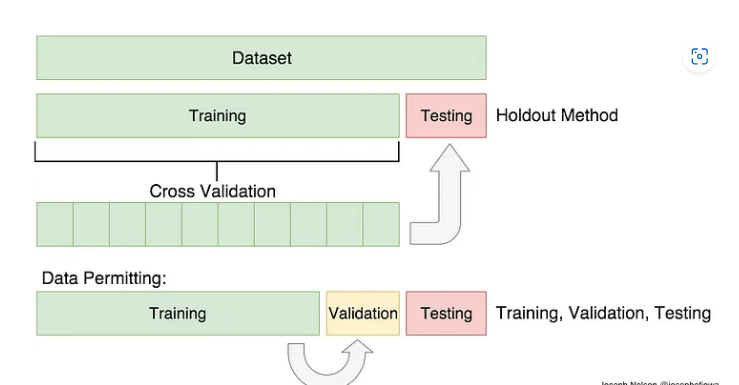

In [ ]:
# Necessary imports:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, X, y, cv=6,error_score='raise')
print("Cross-validated scores:", scores)


Cross-validated scores: [0.17831524 0.15612822 0.1764114  0.17420255 0.16483263 0.15395282]


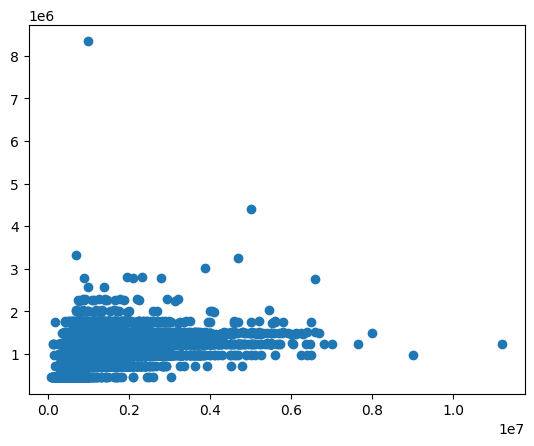

In [ ]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

You can see it’s very different from the original plot from earlier. It is six times as many points as the original plot because I used cv=6.

Finally, let’s check the R² score of the model (R² is a “number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s)”. Basically, how accurate is our model):

**Evaluation Metric: R²**

R-Squared, or the coefficient of determination, is how much variance in the target variable that is explained by our model.

Values can range from 0 to 1. Higher values indicate a model that is highly predictive. For example, a R² value of 0.80 means that the model is accounting for 80% of the variability in the data.

In general, the higher the R² value the better. Low values indicate that our model is not very good at predicting the target. One caution, however, is that a very high R² could be a sign of overfitting.

Let’s look at it from a technical standpoint, using measures like Root Mean Square Error (RMSE) and discrimination coefficient (R2). The RMSE indicates how well a regression model can predict the response variable’s value in absolute terms, whereas the R2 indicates how well a model can predict the response variable’s value in percentage terms.

In [ ]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)


Cross-Predicted Accuracy: 0.1692400194068352


**Bias Vs Variance Tradeoff**

How do we pick the best model? To address this question, we must first comprehend the trade-off between bias and variance.

The mistake caused by the model’s simple assumptions in fitting the data is referred to as bias. A high bias indicates that the model is unable to capture data patterns, resulting in under-fitting.

The mistake caused by the complicated model trying to match the data is referred to as variance. When a model has a high variance, it passes over the majority of the data points, causing the data to overfit.

From the above program, when degree is 1 which means in linear regression, it shows underfitting which means high bias and low variance. And when we get r2 value 100, which means low bias and high variance, which means overfitting

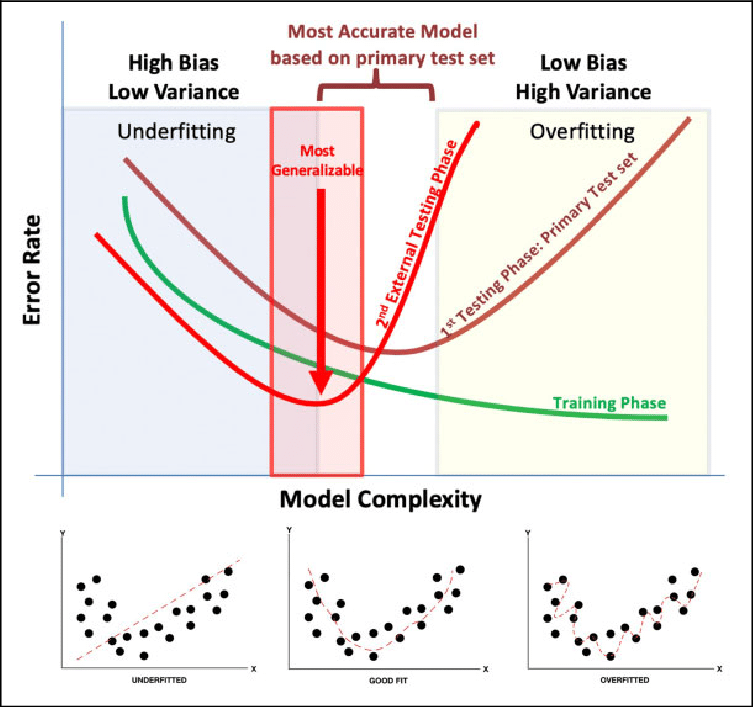

**SOLUTION**

Regularization is a technique that helps overcoming over-fitting problem in machine learning models. It is called Regularization as it helps keeping the parameters regular or normal. The common techniques are L1 and L2 Regularization commonly known as Lasso and Ridge Regression

In [ ]:
import numpy as np
# from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge


print(X,y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model
ridge = Ridge()

# Set up a parameter grid for grid search
param_grid = {
    'alpha': np.logspace(-5, 5, 11),  # Range of alpha values to try (regularization strength)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(ridge, param_grid, cv=5)

# Fit the model to find the best hyperparameters using cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print(best_alpha)
print(test_score)

[[3]
 [3]
 [3]
 ...
 [3]
 [3]
 [3]] [[1490000.]
 [1220000.]
 [1420000.]
 ...
 [ 566000.]
 [ 500000.]
 [ 545000.]]
100.0
0.17386665299308957


 We perform a grid search to find the best value for the regularization parameter alpha in Ridge regression. The GridSearchCV object will perform a cross-validated search over the parameter grid and select the best model based on the given scoring metric (by default, it uses R^2 for regression problems).

You can modify this code to work with your own dataset by replacing the data loading and preprocessing steps with your own data. Additionally, you may consider using different performance metrics, depending on your specific regression task.

**Ridge Regression:**

Imagine you have a set of data points, and you want to draw a straight line that best fits those points. That's what linear regression does. However, sometimes the data might be noisy, and the line can be influenced too much by individual points, leading to overfitting.
Ridge regression helps with this problem. It adds a small correction to the line to prevent it from fitting the data too closely. It's like putting a rubber band around the line to keep it from bending too much to follow individual points. This correction is called regularization.

Ridge regression is useful when there are multiple factors (variables) influencing the result, and some of these factors may be highly correlated. It helps to smooth out the influence of these factors, making the predictions more stable and reliable.

**Grid Search:**

Now, let's say you want to find the best model for your data. A model can have some settings that you can adjust before you start training it. These settings are called hyperparameters, and you need to choose the right values for them to get the best results.
Grid search is like trying out different combinations of these settings to see which combination works best. Imagine you have several dials, and each dial can have different values. You want to find the best setting for each dial to make your model perform the best.

Instead of guessing the best values, grid search goes through all the possible combinations systematically. It evaluates the model's performance with each combination using a method called cross-validation. Cross-validation helps ensure that the model's performance is fair and unbiased.

Once grid search finishes, it tells you the best combination of settings that resulted in the most accurate model for your data.

In summary, Ridge regression helps to prevent overfitting by making the predictions more stable, and grid search helps you find the best settings for your model in a smart and systematic way. Together, they improve the performance and reliability of your machine learning model.

High-order polynomial regression and Ridge regression are two different techniques used for handling complex data relationships in linear regression problems. Let's compare them in simple terms:

High-Order Polynomial Regression:

**In high-order polynomial regression, we still use the linear regression framework, but instead of fitting a straight line (first-order polynomial), we fit a polynomial of a higher degree to the data. This means the model can capture more complex relationships between the input features (predictor variables) and the output (target variable).**
For example, in first-order polynomial regression, the model is of the form: y = b0 + b1x, where 'y' is the target variable, 'x' is the input feature, 'b0' is the intercept, and 'b1' is the coefficient for 'x'. But in high-order polynomial regression, we can have models like: y = b0 + b1x + b2x^2 + b3x^3 + ... + bn*x^n, where 'n' is the degree of the polynomial.

The advantage of high-order polynomial regression is that it can potentially fit more complex patterns in the data. However, there are some challenges with high-order polynomials. They can lead to overfitting, especially if the degree of the polynomial is too high. Overfitting occurs when the model fits the noise in the data rather than the underlying true relationship.

Ridge Regression:

Ridge regression, as explained earlier, is a form of linear regression that adds a regularization term to the objective function. The regularization term penalizes large coefficient values, pushing them towards zero. This helps in preventing overfitting, especially when dealing with multicollinearity (high correlation between predictor variables).
In simple terms, Ridge regression is like applying a "brake" on the coefficients to prevent them from growing too large. It can help make the model more stable and robust by balancing the impact of different features.

Comparison:

High-order polynomial regression is a way to capture complex relationships in the data but can lead to overfitting if not controlled properly.
Ridge regression is a way to prevent overfitting and stabilize the model by adding a penalty to the coefficient values.
In practice, you might choose between these techniques based on the complexity of your data and the risk of overfitting. High-order polynomial regression can be useful when you believe the relationship between the variables is highly nonlinear and want to capture intricate patterns. Ridge regression, on the other hand, is beneficial when dealing with multicollinearity or when you want to avoid excessive complexity in the model. In some cases, a combination of both approaches, like polynomial features with Ridge regression, can also be used to find a good balance between flexibility and stability.

The main implications of the differences between Lasso and Ridge regression are as follows:

Lasso regression can perform feature selection, which makes it useful when you suspect that some features are irrelevant or less important to the prediction. It effectively helps in building a more interpretable model by reducing the number of features.

Ridge regression, on the other hand, doesn't perform feature selection and instead shrinks all coefficients towards zero. It is suitable when you have a large number of potentially relevant features and you want to keep them all in the model, but at the same time, avoid overfitting by limiting the size of the coefficients.

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

url="https://www.kaggle.com/anthonypino/melbourne-housing-market"

In [ ]:
# read dataset
dataset = pd.read_csv("HOUSEPRICE.csv")
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [ ]:
dataset.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [ ]:
dataset.dropna(inplace=True)

In [ ]:

dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [ ]:
X = dataset['Distance'].values.reshape(-1,1)
y = dataset['Price'].values.reshape(-1,1)

The random state is a random seed for random data set splitting. Generalization error is a measure of how well our data does at predicting previously unseen data. The error we obtain using our testing data is an approximation of this error

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

0.17387641206334603

In [ ]:
reg.score(train_X, train_y)

0.06294789582910443

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(X_test, y_test)

0.1738757769142082

In [ ]:

lasso_reg.score(train_X, train_y)

0.0629478957046512

In [ ]:
# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(test_X, test_y)

0.0674696704556963

In [ ]:

ridge_reg.score(train_X, train_y)

0.06294789578730664

https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn